In [1]:
import vegas
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def harmonic(x):                                        #Harmonic Oscillator Potential
    return np.sum(x**2) / 2            

def quartic(x):                                         #Quartic Potential
    return np.sum(x**4) / 2

def action(m, a, x, mode='harmonic'):                   #Action 
    E_kin = 0                                           #Initialising the kinetic energy
    for i in range(len(x)):
        E_kin += (x[i] - x[i-1])**2                     #Adding the terms (x_{j+1} - x_{j})^2
                                                        #with constraint x_{N} = x_{0}
    E_kin *= m / (2 * a)                                #Multiplying with mass
        
    if mode=='harmonic':                                #Obtaining the potential
        E_pot = a * harmonic(x)
    elif mode=='quartic':
        E_pot = a * quartic(x)
    
    return E_kin + E_pot                                #Action = E_kin + Potential

def ground_path(m, a, x, N, mode='harmonic'):           #Numerical Path Integral For Arbitrary Potential
    def f(y):                                           #Initialising the function for integration
        z = [x]                                         #x0
        for i in range(len(y)):
            z.append(z[i] + y[i])                       #x_{j+1} = x_{j} + dx_{j}
        return np.exp(- action(m, a, np.array(z), mode))#Computing e^{-S}

    integr = vegas.Integrator((N-1) * [[-5, 5]])        #Vegas N-1 dim integral from -5 to 5

    integr(f, nitn=20, neval=1000)                      #A good practice is to train Vegas
                                                        #to adapt to the integrand

    result = integr(f, nitn=10, neval=1000) * ((m / (2 * np.pi * a))**(N/2))

    return result

In [4]:
xx = np.linspace(0, 2, 100)                             #Initialising the grid
mean = []
sdev = []
for x in xx:
    result = ground_path(1, 0.5, x, 8, mode='harmonic') #Computing the path integral
    mean.append(result.mean)                            #Extracting the weighted average
    sdev.append(result.sdev)                            #Extracting the standard deviation


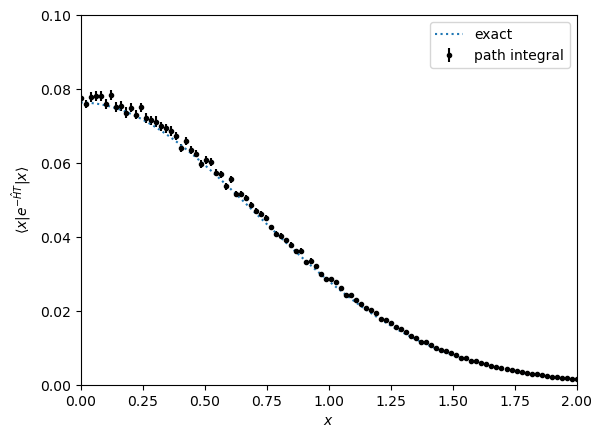

In [5]:
benc = np.exp(-2) * np.exp(-(xx**2)) / (np.pi**(1/2))   #Benchmark calculation, Correlator = e^{-ET} Psi^2

plt.errorbar(xx, np.array(mean), sdev, fmt='.', color='black', label = 'path integral')
plt.plot(xx, benc, linestyle = ':', label = 'exact')
plt.ylim(0, 0.1)
plt.xlim(0, 2)
plt.xlabel(r'$x$')
plt.ylabel(r'$\langle x|e^{-\hat{H}T}|x\rangle$')
plt.legend()
plt.show()

In [6]:
#The integration grid for computing ground state energy
#Use trapezoid, but no factor of half to compensate
#x which should run from negative axis to positive axis
#(in which our data here only run from zero to positive)
integral = 0
for i in range(len(mean) - 1):
    integral += (mean[i+1] + mean[i])
integral *= xx[1] - xx[0]

E_numeric = - np.log(integral) / 4      #The numerical value of energy
                                        #E = -log(int correlator) / T
print(E_numeric) 

0.4960527963178184


In [7]:
xxq = np.linspace(0, 2, 100)                            #Initialising the grid
meanq = []
sdevq = []
for x in xx:
    result = ground_path(1, 0.5, x, 8, mode='quartic') #Computing the path integral
    meanq.append(result.mean)                          #Extracting the weighted average
    sdevq.append(result.sdev)                          #Extracting the standard deviation


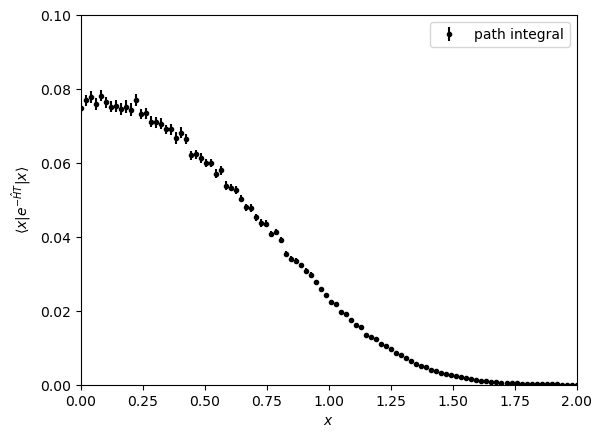

In [8]:
plt.errorbar(xxq, np.array(meanq), sdevq, fmt='.', color='black', label = 'path integral')
plt.ylim(0, 0.1)
plt.xlim(0, 2)
plt.xlabel(r'$x$')
plt.ylabel(r'$\langle x|e^{-\hat{H}T}|x\rangle$')
plt.legend()
plt.show()

In [9]:
integral = 0
for i in range(len(meanq) - 1):
    integral += (meanq[i+1] + meanq[i])
integral *= xxq[1] - xxq[0]

E_numeric = - np.log(integral) / 4      #The numerical value of energy
                                        #E = -log(int correlator) / T
print(E_numeric) 

0.5186646840019218
